In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import logging
import sys
from brats_dataset import BratsDataset
import brats_dataset as bd
import visualisation
import importlib
import inference
import data_processing as dproc
from loss import DiceLoss
import elastic_transform
import pipeline
import serialization

Processing /Users/sw/work/msc_ai_diss/output/2023_09_15__12_52_22_val...
Processing /Users/sw/work/msc_ai_diss/output/2023_09_15__05_37_53_val...
Processing /Users/sw/work/msc_ai_diss/output/2023_09_14__00_22_01_val...
Processing /Users/sw/work/msc_ai_diss/output/2023_09_12__00_11_18_val...
Processing /Users/sw/work/msc_ai_diss/output/2023_09_13__05_59_35_val...


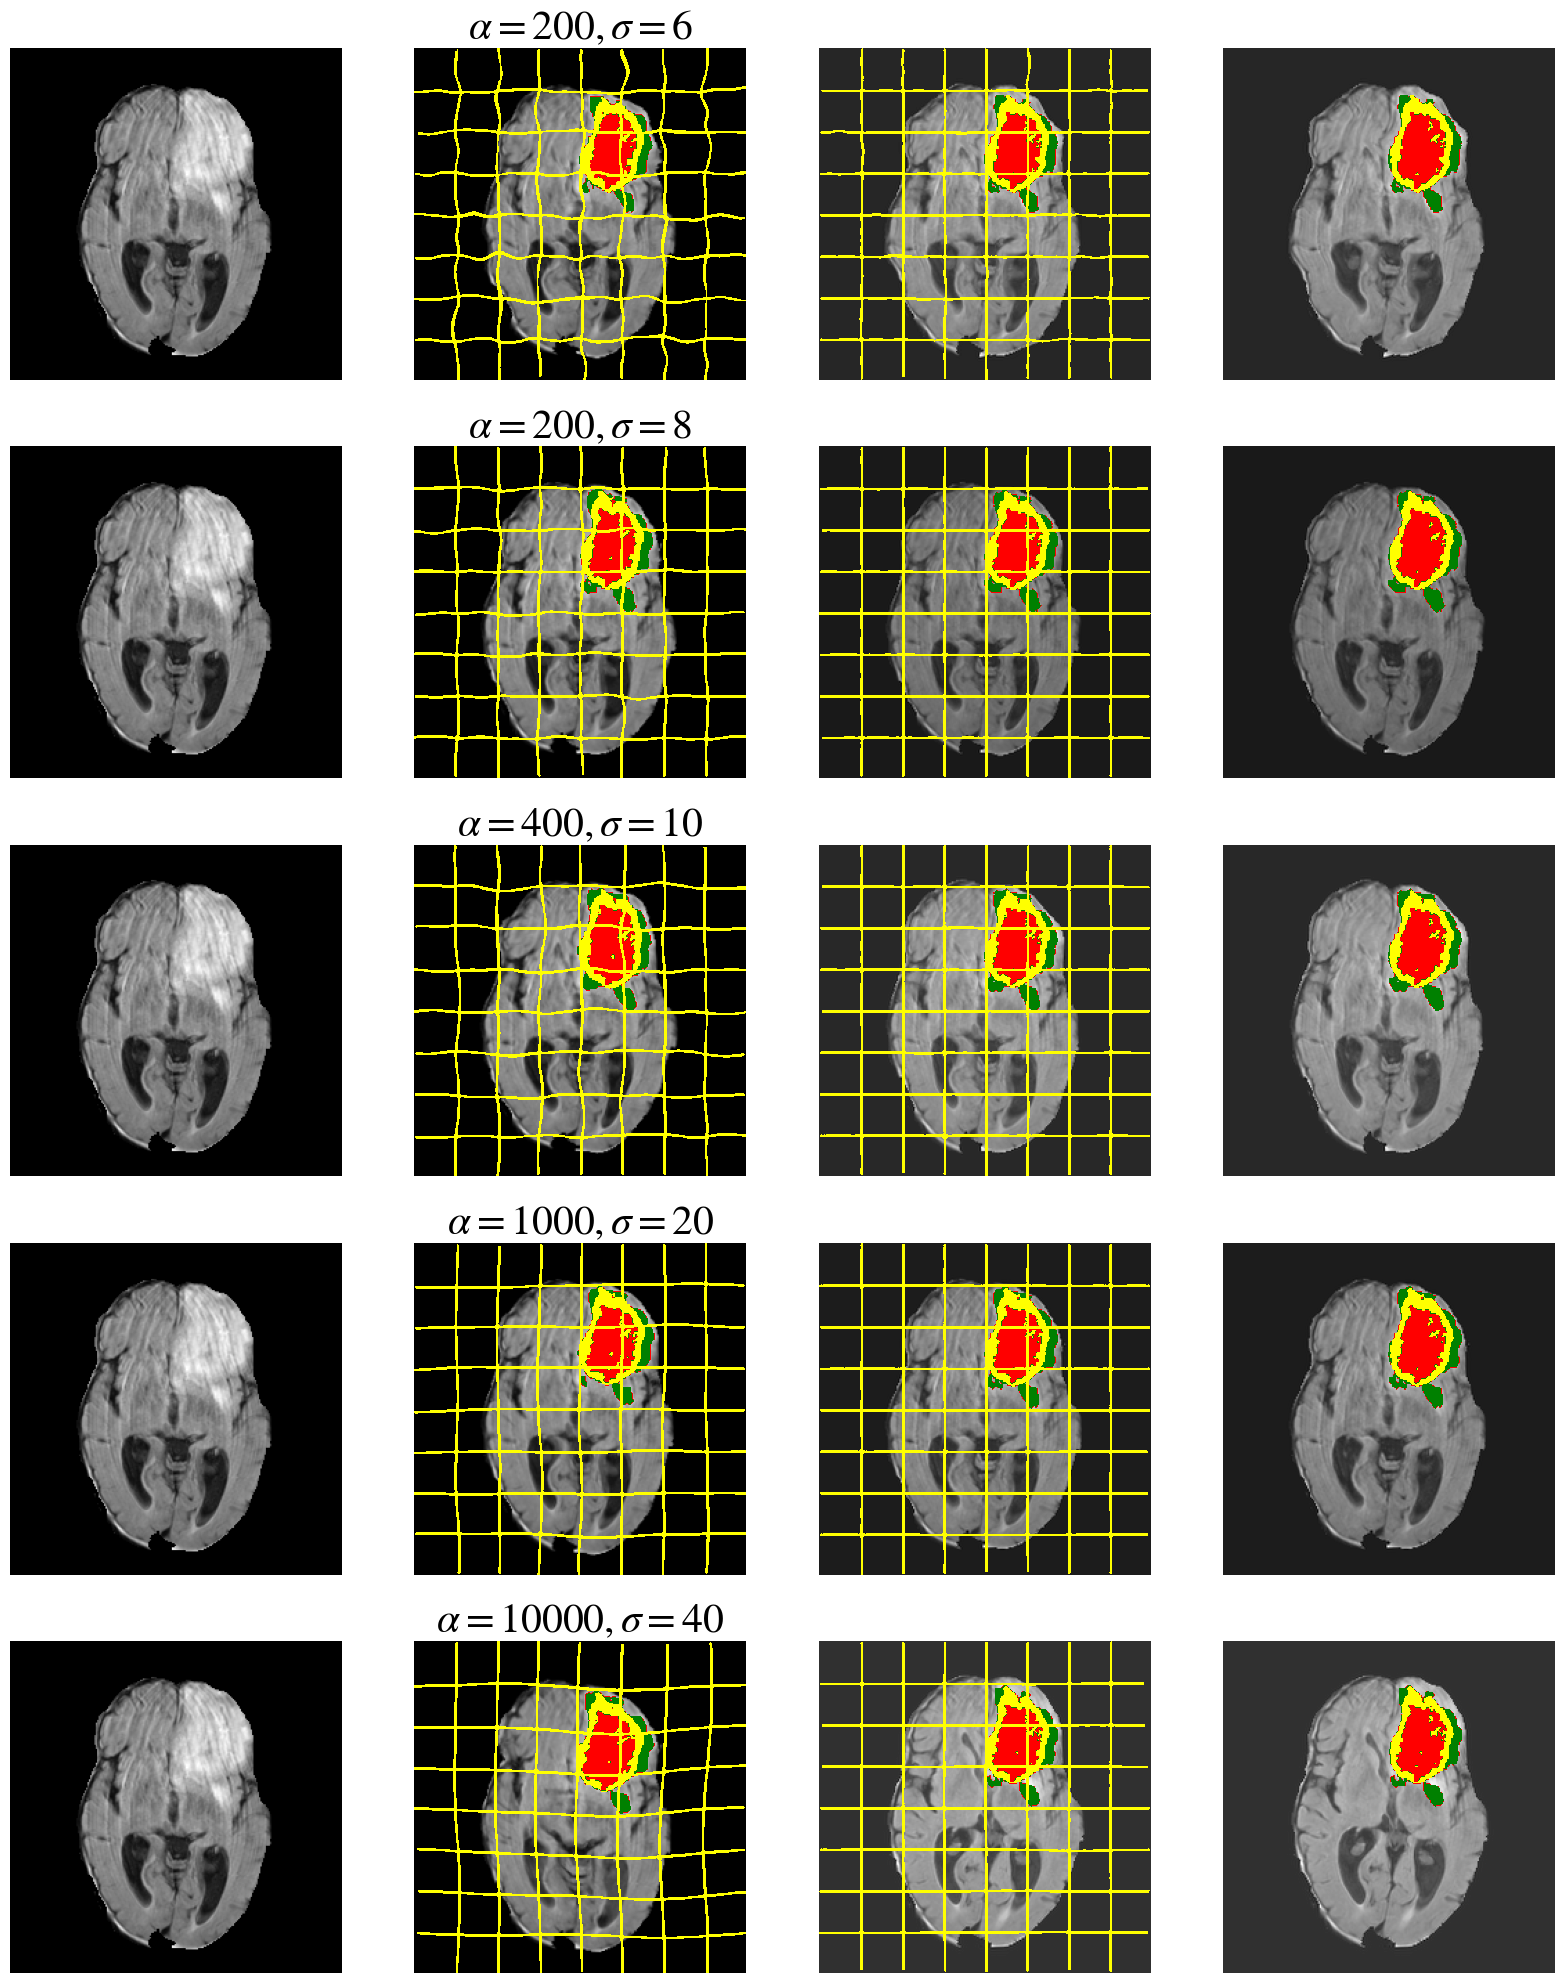

In [18]:
import serialization

dirs = {
    "/Users/sw/work/msc_ai_diss/output/2023_09_15__12_52_22_val": r"$\alpha=200, \sigma=6$",
    "/Users/sw/work/msc_ai_diss/output/2023_09_15__05_37_53_val": r"$\alpha=200, \sigma=8$",
    "/Users/sw/work/msc_ai_diss/output/2023_09_14__00_22_01_val": r"$\alpha=400, \sigma=10$",
    "/Users/sw/work/msc_ai_diss/output/2023_09_12__00_11_18_val": r"$\alpha=1000, \sigma=20$",
    "/Users/sw/work/msc_ai_diss/output/2023_09_13__05_59_35_val": r"$\alpha=10000, \sigma=40$",
}

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

columns = 4
# rows = transformation_count * 2
rows = len(dirs)
fig = plt.figure(figsize=(5 * columns, 5 * rows))

z_projection = 61  #  110 for 547 # 61 for 1552
modality = 0

chart_num = 1

for result_path, caption in dirs.items():
    print(f"Processing {result_path}...")
    ser = serialization.Serialization(result_path)
    ip = ser.read_from_file("ip_8.pkl")
    p = ip.pipelines[0]

    # source
    ax = fig.add_subplot(rows, columns, chart_num)
    # ax.set_title(f"({row}-a)", fontsize=20)
    ax.set_axis_off()
    chart_num += 1
    plt.imshow(p.mri_4d[modality, :, :, z_projection].T, cmap='gray')

    # pred - transformed with grid
    ax = fig.add_subplot(rows, columns, chart_num)
    ax.set_title(caption, fontsize=30)
    ax.set_axis_off()
    chart_num += 1
    plt.imshow(p.mri_transformed_4d[modality, :, :, z_projection].T, cmap='gray')
    plt.imshow(p.pred_segmentation_transformed_3d[:, :, z_projection].T,
               cmap=visualisation.segmentation_cmap)
    plt.imshow(p.grid_transformed_3d[:, :, z_projection].T, cmap=visualisation.grid_cmap)

    # pred - restored with grid
    ax = fig.add_subplot(rows, columns, chart_num)
    # ax.set_title(f"({row}-c)", fontsize=20)
    ax.set_axis_off()
    chart_num += 1
    plt.imshow(p.mri_restored_4d[modality, :, :, z_projection].T, cmap='gray')
    plt.imshow(p.pred_segmentation_restored_3d[:, :, z_projection].T,
               cmap=visualisation.segmentation_cmap)
    plt.imshow(p.grid_restored_3d[:, :, z_projection].T, cmap=visualisation.grid_cmap)

    # pred - restored
    ax = fig.add_subplot(rows, columns, chart_num)
    # ax.set_title(f"({row}-d)", fontsize=20)
    ax.set_axis_off()
    chart_num += 1
    plt.imshow(p.mri_restored_4d[modality, :, :, z_projection].T, cmap='gray')
    plt.imshow(p.pred_segmentation_restored_3d[:, :, z_projection].T,
               cmap=visualisation.segmentation_cmap)
